                                                    Final Project
Project Overview: The purpose of this project is to study the relationship between interest rate and unemployment rate. History shows that there is unemployment tends to be higher with higher interest rates. Higher interest rates can slow down the inflation but higher unemployment rate also means people's demand for goods decrease. This project is going to prove the direct relationship between interest rate and unemployment rate.


Project Structure: This project is split into three sections:

The first section will provide a data report, which will explain where the data comes from.

The second section consists of time series data of the effective federal funds rate (interest rate) and the unemployment rate.

The third section will state a hypothesis. A linear regression analysis will be used to test the hypothesis and show the results. There will be a follow-up analysis on our results.


Data Report:

The data for this project comes from the Federal Reserve Economic Data (FRED). FRED provides monthly data on the U.S.'s effective federal funds rate and the unemployment rate from 1948 and onwards. It will also identify times of economic contractions. The data can be accessed at http://https://fred.stlouisfed.org/


Important variables:

The two main key variables for this project are the effective federal funds rate and the unemployment rate.

FRED defines the effective federal funds rate in two main ways: "The federal funds is the interest rate at which depository institutions trade federal funds (balances held at Federal Reserve Banks) with each other overnight... The federal funds rate is the central interest rate in the U.S. financial market. It influences other interest rates such as the prime rate, which is the rate banks charge their customers with higher credit ratings. Additionally, the federal funds rate indirectly influences longer- term interest rates such as mortgages, loans, and savings, all of which are very important to consumer wealth and confidence.(2)"

FRED defines the unemployment rate as the "number of unemployed as a percentage of the labor force. Labor force data are restricted to people 16 years of age and older, who currently reside in 1 of the 50 states or the District of Columbia, who do not reside in institutions (e.g., penal and mental facilities, homes for the aged), and who are not on active duty in the Armed Forces.

In [71]:
#Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [72]:
#Access Data
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
data = pd.read_csv(url, parse_dates=True)
data.head()

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [73]:
data.columns = ['DATE','URATE']

In [74]:
data.head()

,DATE,URATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [75]:
#Summary Statistics for Unemployment Rate
data.describe()

,URATE
count,875.000000
mean,5.765371
std,1.707381
min,2.500000
25%,4.500000
50%,5.600000
75%,6.800000
max,14.700000


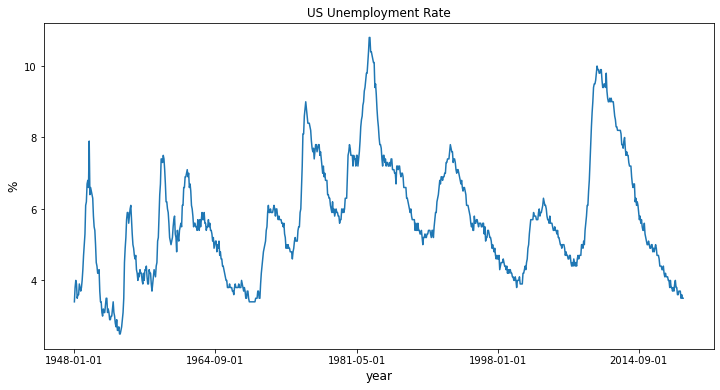

In [76]:
#Graphing the Unemployment Rate
data1=data.set_index('DATE')
ax = data1['1948':'2020'].plot(title='US Unemployment Rate', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

In [77]:
#Access Data
url_r = 'http://research.stlouisfed.org/fred2/series/FEDFUNDS/downloaddata/FEDFUNDS.csv'
data_r = pd.read_csv(url_r, parse_dates=True)
data_r.head()

,DATE,VALUE
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [78]:
data_r.columns=['DATE', 'FFR']
data_r.head()

,DATE,FFR
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [79]:
#Summary Statistics for FFR
data_r.describe()

,FFR
count,797.000000
mean,4.712986
std,3.605116
min,0.050000
25%,1.980000
50%,4.290000
75%,6.500000
max,19.100000


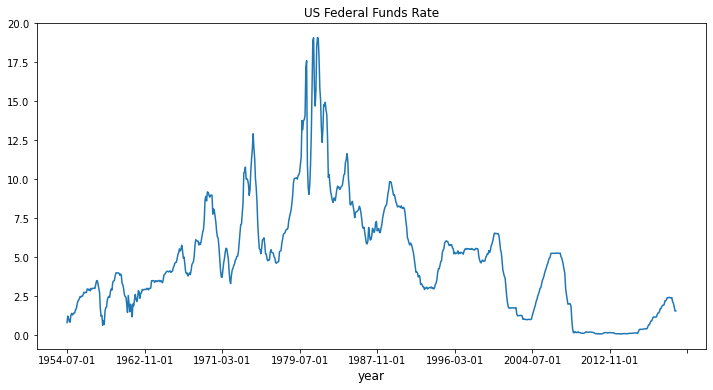

In [80]:
#Graphing Federal Funds Rate
data_r1=data_r.set_index('DATE')
ax = data_r1['1954':'2020'].plot(title='US Federal Funds Rate', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
plt.show()

In [81]:
data_merge=pd.merge(data, data_r, how='inner', on='DATE', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [82]:
data_merge.head()

,DATE,URATE,FFR
0,1954-07-01,5.8,0.80
1,1954-08-01,6.0,1.22
2,1954-09-01,6.1,1.07
3,1954-10-01,5.7,0.85
4,1954-11-01,5.3,0.83


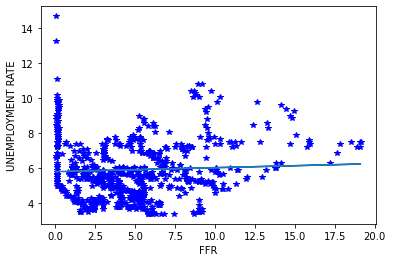

In [83]:
from numpy.polynomial.polynomial import polyfit
fig,ax=plt.subplots()
ax.plot(data_merge['FFR'],data_merge['URATE'],'b*')
ax.set_xlabel("FFR")
ax.set_ylabel("UNEMPLOYMENT RATE")
b,m=polyfit(data_merge['FFR'],data_merge['URATE'],1)
ax.plot(data_merge['FFR'],b+m*data_merge['FFR'],'-')

In [84]:
m

0.02280598330496242

Regression Analysis

We want to establish a relationship between the unemployment rate and the federal funds rate. We will run a linear regression. 

In [85]:
from scipy.stats import linregress
# Testing the relationship between unemployment rate and federal funds rate
gradient, intercept, r_value, p_value, std_err = linregress(data_merge['FFR'], data_merge['URATE'])
print("gradient: ", gradient)
print("intercept: ", intercept)
print("std_err: ", std_err)
print("p_value: ", p_value)

gradient:  0.02280598330496239
intercept:  5.81547681958687
std_err:  0.01628714739569078
p_value:  0.16183035055209471


From the regression results, we establish a positive relationship between unemployment rate and federal funds rate, even though we find the results to not be statistically significant. 


In [86]:
#Regression of unemployment rate on inflation rate and federal funds rate.
data_merge['const'] = 1
reg1 = sm.OLS(endog=data_merge['URATE'], exog=data_merge[['const','FFR']], \
    missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [87]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [88]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  URATE   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.961
Date:                Sun, 13 Dec 2020   Prob (F-statistic):              0.162
Time:                        08:43:21   Log-Likelihood:                -1532.2
No. Observations:                 797   AIC:                             3068.
Df Residuals:                     795   BIC:                             3078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8155      0.097     60.188      0.0

Discussion 1:

From our regression summary, we observe that our R-squared value was 0.002, which indicates that only a very small portion of the unemployment rate can be explained by the federal funds rate.

We can also see that there are possible errors in our regression. We may have omitted some variable, such as inflation rate, that may lead our FFR estimator to be biased and inconsistent. We also may have to create a model that can correctly capture the effects of the FFR on the unemployment rate, based off of the graph above.

We will continue our regression by changing our original model to fit a polynomial line and observe the changes.

In [57]:
# Adding a Polynomial term
data_r_sq =pd.read_csv(url_r, parse_dates=True)
data_r_sq.columns=['DATE', 'FFR']
data_r_sq['FFR'] = data_r_sq['FFR']*data_r_sq['FFR']
data_r_sq.head()

,DATE,FFR
0,1954-07-01,0.6400
1,1954-08-01,1.4884
2,1954-09-01,1.1449
3,1954-10-01,0.7225
4,1954-11-01,0.6889


In [58]:
data_r_sq.describe()

,FFR
count,797.000000
mean,35.192794
std,51.781586
min,0.002500
25%,3.920400
50%,18.404100
75%,42.250000
max,364.810000


In [94]:
data_merge=pd.merge(data_merge, data_r_sq, how='inner', on='DATE', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [119]:
data_merge.head()

,DATE,URATE,FFR_x,const,FFR_y
0,1954-07-01,5.8,0.80,1,0.6400
1,1954-08-01,6.0,1.22,1,1.4884
2,1954-09-01,6.1,1.07,1,1.1449
3,1954-10-01,5.7,0.85,1,0.7225
4,1954-11-01,5.3,0.83,1,0.6889


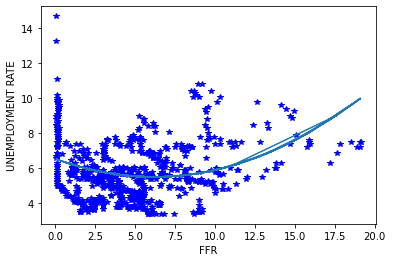

In [130]:
fig,ax=plt.subplots()
ax.plot(data_merge['FFR_x'],data_merge['URATE'],'b*')
ax.set_xlabel("FFR")
ax.set_ylabel("UNEMPLOYMENT RATE")
b2,m1,m2=polyfit(data_merge['FFR_x'],data_merge['URATE'],2)
ax.plot(data_merge['FFR_x'],b2+m1*data_merge['FFR_x']+m2*data_merge['FFR_y'],'-')

In [133]:
print("b2: ", b2)
print("m1: ", m1)
print("m2: ", m2)

b2:  6.546671205497683
m1:  -0.33363107945360343
m2:  0.026956898489044027


In [134]:
reg2 = sm.OLS(endog=data_merge['URATE'], exog=data_merge[['const','FFR_x','FFR_y']], \
    missing='drop')
type(reg2)

statsmodels.regression.linear_model.OLS

In [135]:
results_2 = reg2.fit()
type(results_2)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [136]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  URATE   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     49.39
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           6.08e-21
Time:                        12:01:58   Log-Likelihood:                -1486.5
No. Observations:                 797   AIC:                             2979.
Df Residuals:                     794   BIC:                             2993.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5467      0.118     55.589      0.0

Discussion 2:

We can see that the R-squared value for the 2nd regression with the polynomial term is higher than the previous. We also
observe that the original FFR now has a negative coefficient (FFR_x), and the new FFR has a positive coefficient (FFR_y). Our results are statistically significant at a 1% level for the new FFR, to say that this polynomial term can be added to our regression without a problem. We can say that the polynomial fitted line is better than the linear fitted line.

Conclusion:

In this project, we wanted to see if there was a relationship between the unemployment rate and the federal funds rate. Historically, when the interest rates are high, unemployment rate tends to be higher. As interest rates go up, the cost of borrowing money goes up, which leads to firms borrowing less money. If there is less money, then less people are hired for jobs. Thus, the unemployment rate increases.

